# importando a base de dados e os pacotes necessarios

In [116]:
#Importação de pacotes
import warnings
import pandas as pd
df = pd.read_csv('diabete.csv')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

### Traduzinfo a base de dados 

In [117]:
df.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


In [118]:
df_traduzida = df.rename(columns={'gender':'Sexo','age':'Idade','hypertension':'hipertensão','heart_disease':'doença_cardíaca','smoking_history':'histórico_tabagismo','blood_glucose_level':'glicose'})
df_traduzida.head()

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [119]:
df_traduzida.shape  

(100000, 9)

# ANÁLISE DE DADOS E EXPLORATÓRIA

In [120]:
df_traduzida.duplicated().sum()

3854

In [121]:
df_traduzida = df_traduzida.drop_duplicates()

In [122]:
df_traduzida.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sexo                 96146 non-null  object 
 1   Idade                96146 non-null  float64
 2   hipertensão          96146 non-null  int64  
 3   doença_cardíaca      96146 non-null  int64  
 4   histórico_tabagismo  96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   glicose              96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


# ANÁLISE EXPLORATÓRIA

### ESTATÍSTICA

In [123]:
df_traduzida.describe()

,Idade,hipertensão,doença_cardíaca,bmi,HbA1c_level,glicose,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


### MODA

In [124]:
from statistics import mode

mode(df_traduzida['Idade'])

80.0

In [125]:
mode(df_traduzida['hipertensão'])

0

In [126]:
mode(df_traduzida['doença_cardíaca'])

0

In [127]:
mode(df_traduzida['bmi'])

27.32

In [128]:
mode(df_traduzida['HbA1c_level'])

6.6

In [129]:
mode(df_traduzida['glicose'])

159

In [130]:
mode(df_traduzida['diabetes'])

0

### ASSIMETRIA

In [131]:
df_traduzida['Idade'].skew()

-0.062444736060842554

In [132]:
df_traduzida['hipertensão'].skew()

3.157675835478418

In [133]:
df_traduzida['doença_cardíaca'].skew()

4.642358789539726

In [134]:
df_traduzida['bmi'].skew()

1.0237511657232292

In [135]:
df_traduzida['HbA1c_level'].skew()

-0.054463243946481645

In [136]:
df_traduzida['glicose'].skew()

0.83648926055032

In [137]:
df_traduzida['diabetes'].skew()

2.9038452407823976

### CURTOSE

In [138]:
df_traduzida['Idade'].kurt()

-1.004415677016537

In [139]:
df_traduzida['hipertensão'].kurt()

7.97108249357777

In [140]:
df_traduzida['doença_cardíaca'].kurt()

19.55190184313021

In [141]:
df_traduzida['HbA1c_level'].kurt()

0.23900685117797815

In [142]:
df_traduzida['glicose'].kurt()

1.7584763418256188

In [143]:
df_traduzida['diabetes'].kurt()

6.432450987880998

In [144]:
df_traduzida['bmi'].kurt()

3.271554032432832

### HISTOGRAMA

array([[<Axes: title={'center': 'Idade'}>,
        <Axes: title={'center': 'hipertensão'}>,
        <Axes: title={'center': 'doença_cardíaca'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'glicose'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

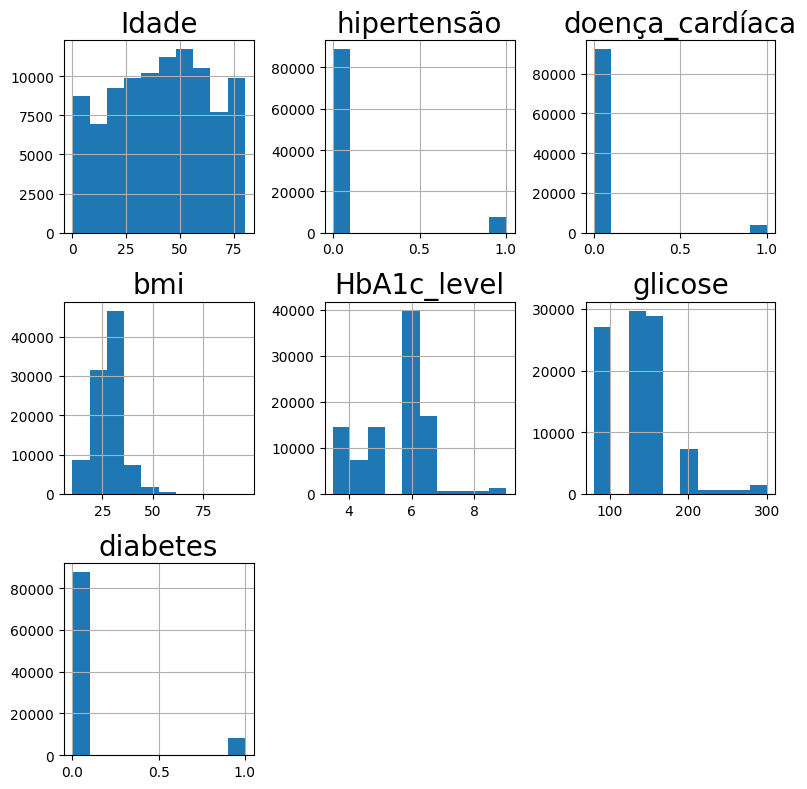

In [145]:
df_traduzida.hist()

In [146]:
df_traduzida.head(1)

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


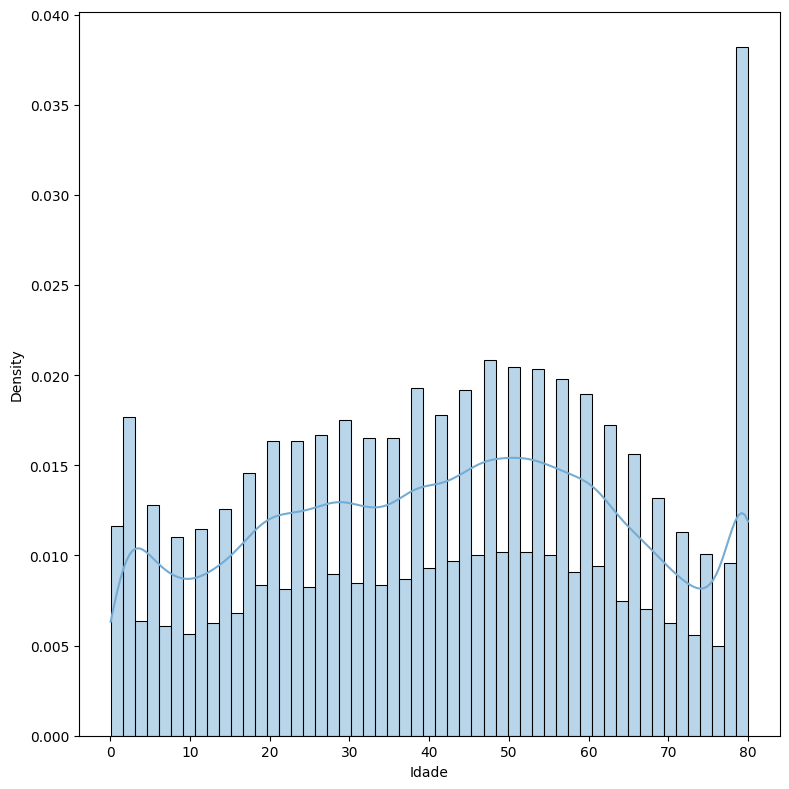

In [147]:
ax = sns.histplot(df_traduzida.Idade, stat="density", kde=True, color='#74acd4', lw=1)

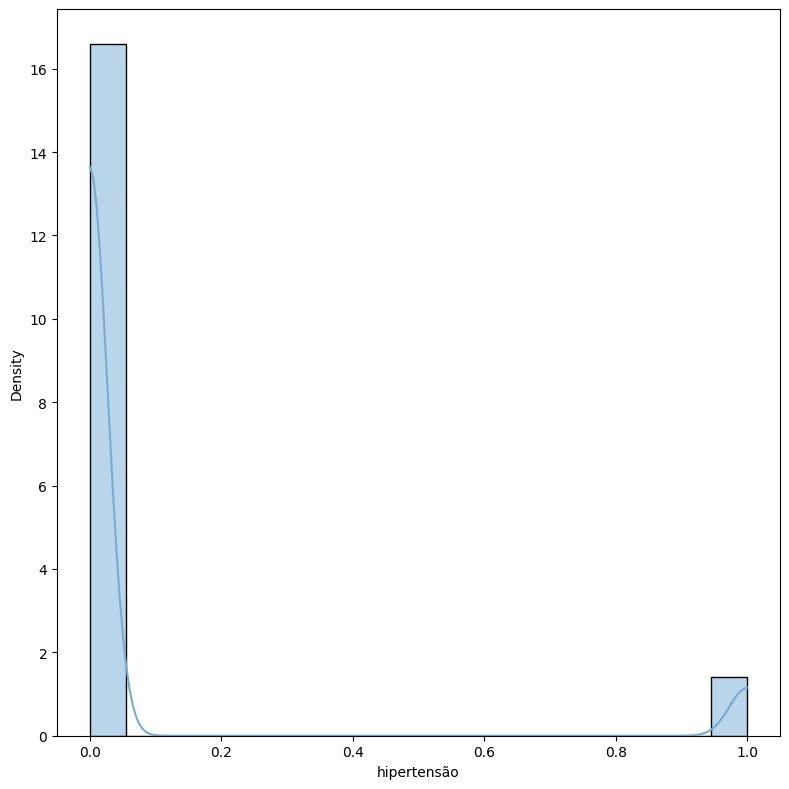

In [148]:
ax = sns.histplot(df_traduzida.hipertensão, stat="density", kde=True, color='#74acd4', lw=1)

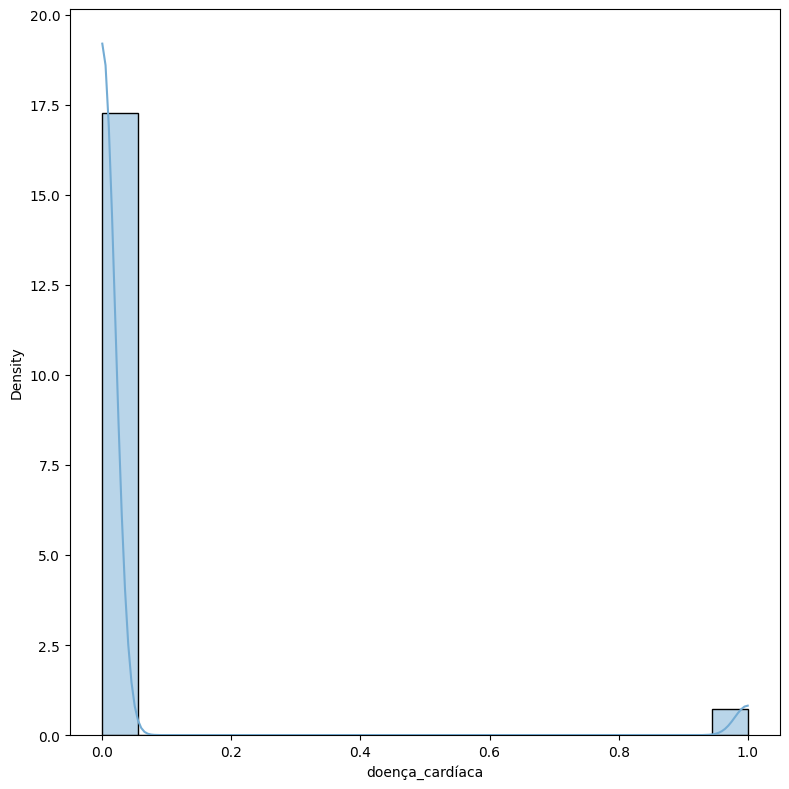

In [149]:
ax = sns.histplot(df_traduzida.doença_cardíaca, stat="density", kde=True, color='#74acd4', lw=1)

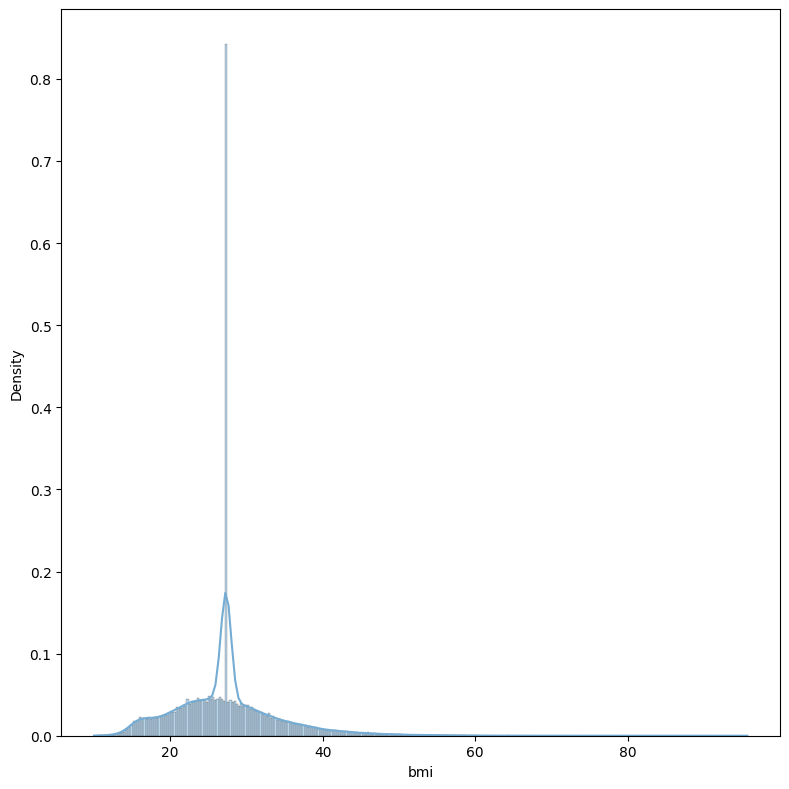

In [150]:
ax = sns.histplot(df_traduzida.bmi, stat="density", kde=True, color='#74acd4', lw=1)

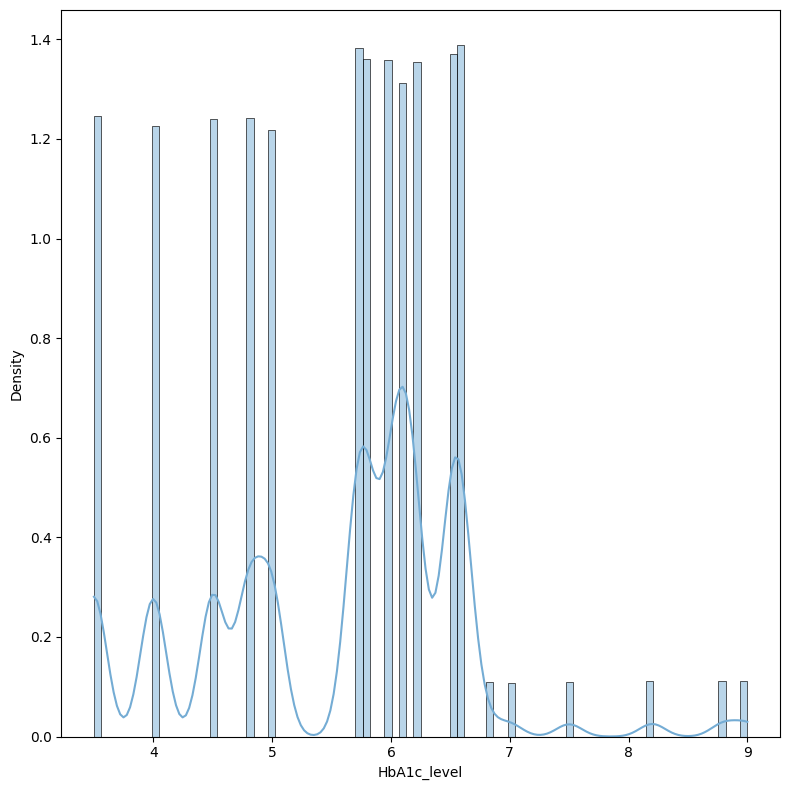

In [151]:
ax = sns.histplot(df_traduzida.HbA1c_level, stat="density", kde=True, color='#74acd4', lw=1)

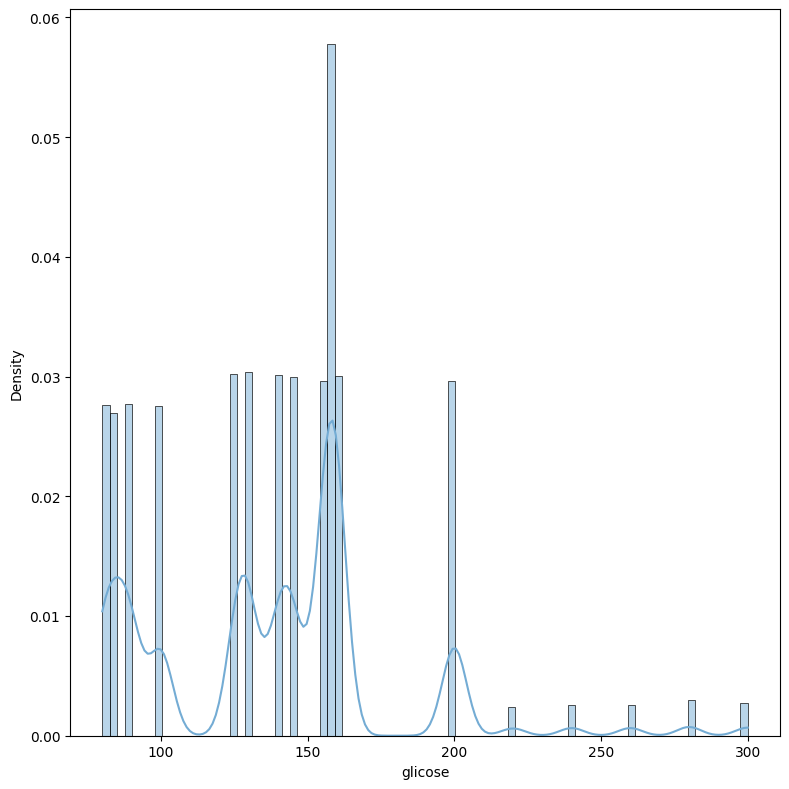

In [152]:
ax = sns.histplot(df_traduzida.glicose, stat="density", kde=True, color='#74acd4', lw=1)

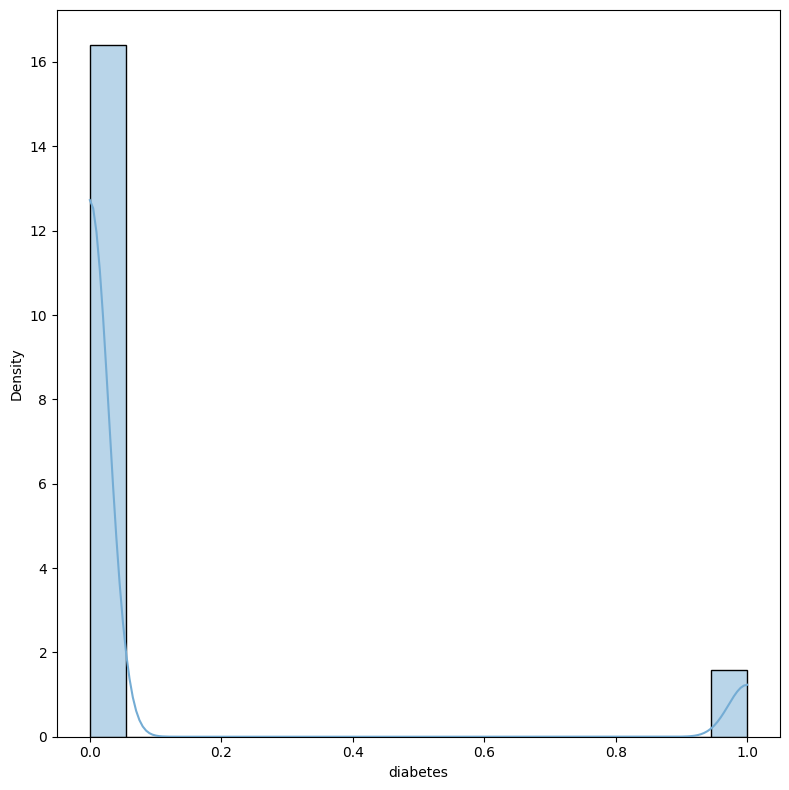

In [153]:
ax = sns.histplot(df_traduzida.diabetes, stat="density", kde=True, color='#74acd4', lw=1)

# ANÁLISE DE DADOS 

### AGRUPAMENTO

In [154]:
df_traduzida.groupby(['Sexo']).size()

Sexo
Female    56161
Male      39967
Other        18
dtype: int64

In [155]:
df_traduzida.groupby(['hipertensão']).size()

hipertensão
0    88685
1     7461
dtype: int64

In [156]:
df_traduzida.groupby(['doença_cardíaca']).size()

doença_cardíaca
0    92223
1     3923
dtype: int64

In [157]:
df_traduzida.groupby(['histórico_tabagismo']).size()

histórico_tabagismo
No Info        32887
current         9197
ever            3998
former          9299
never          34398
not current     6367
dtype: int64

In [158]:
df_traduzida.groupby(['diabetes']).size()

diabetes
0    87664
1     8482
dtype: int64

In [159]:
df_traduzida.groupby(['HbA1c_level']).size()

HbA1c_level
3.5    7319
4.0    7205
4.5    7290
4.8    7296
5.0    7155
5.7    8124
5.8    7992
6.0    7988
6.1    7716
6.2    7958
6.5    8051
6.6    8164
6.8     642
7.0     633
7.5     642
8.2     659
8.8     660
9.0     652
dtype: int64

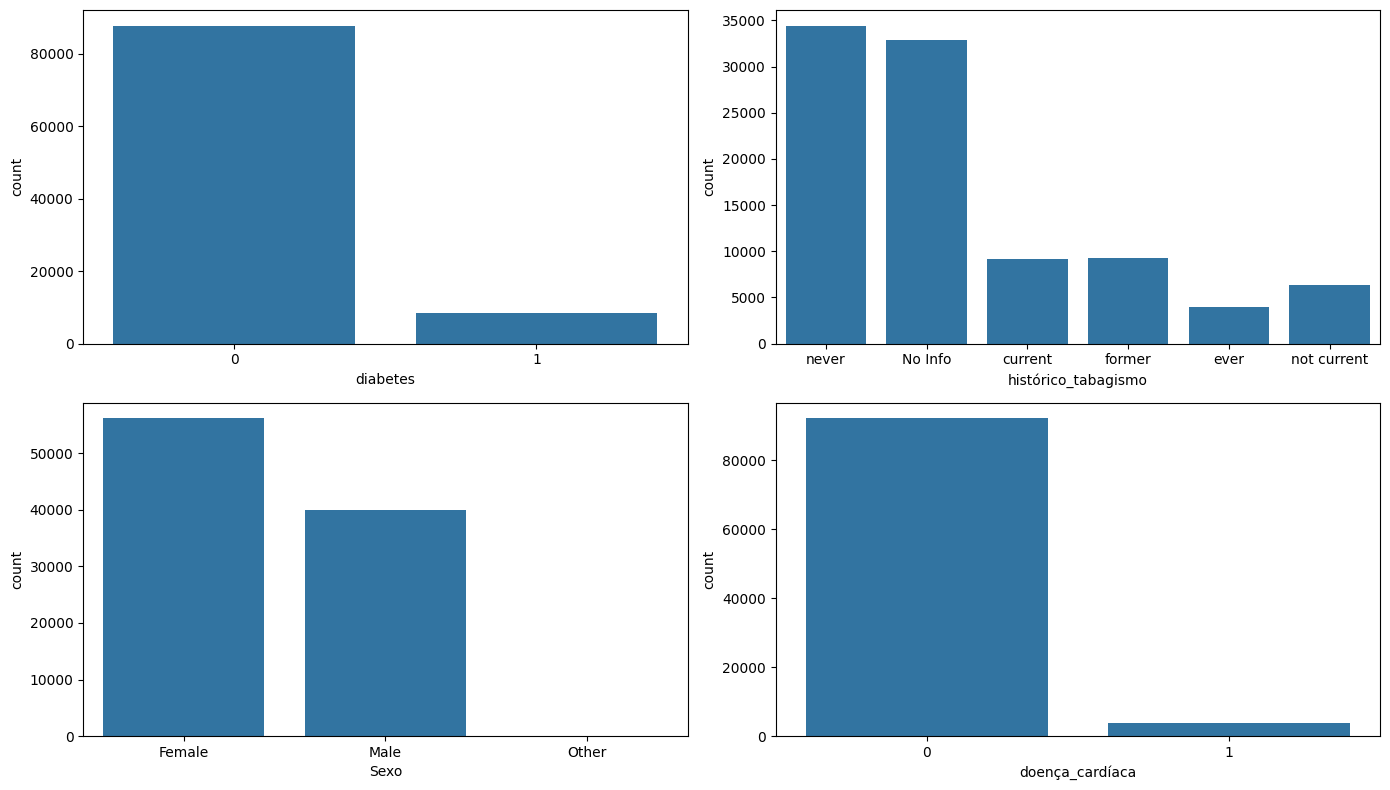

In [160]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_traduzida, x="diabetes", ax=axes[0][0])
sns.countplot(data = df_traduzida, x="histórico_tabagismo", ax=axes[0][1])
sns.countplot(data = df_traduzida, x="Sexo", ax=axes[1][0])
sns.countplot(data = df_traduzida, x="doença_cardíaca", ax=axes[1][1])
plt.show()

### Verificando se há alguma correlação entre as variaveis

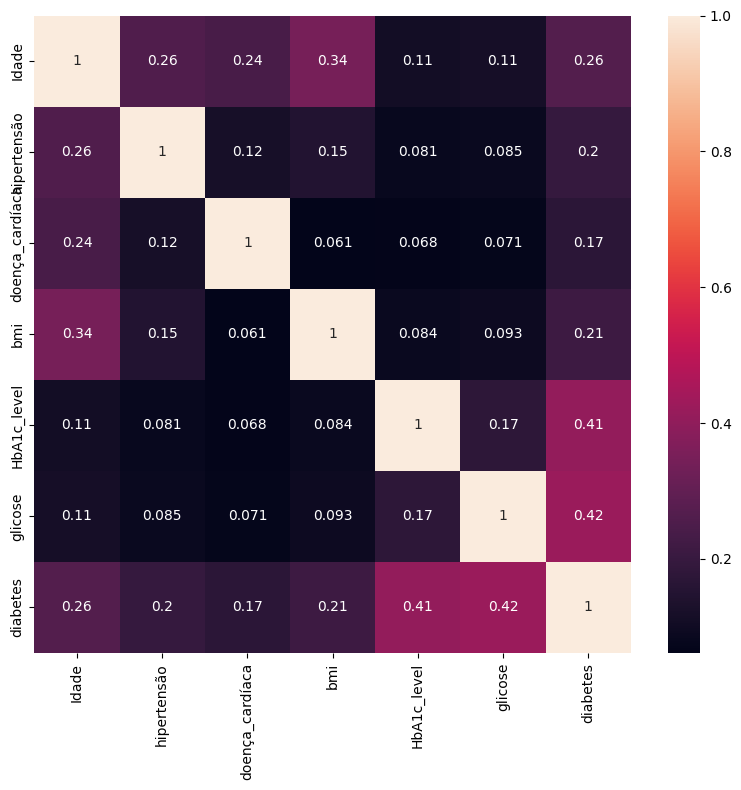

In [161]:
df_numeric = df_traduzida.select_dtypes(include=['float64', 'int64'])

# Configurações de plot que você já especificou
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True

# Crie o heatmap apenas para as colunas numéricas
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

# verificando se há outliers

Idade : float64
hipertensão : int64
doença_cardíaca : int64
bmi : float64
HbA1c_level : float64
glicose : int64
diabetes : int64


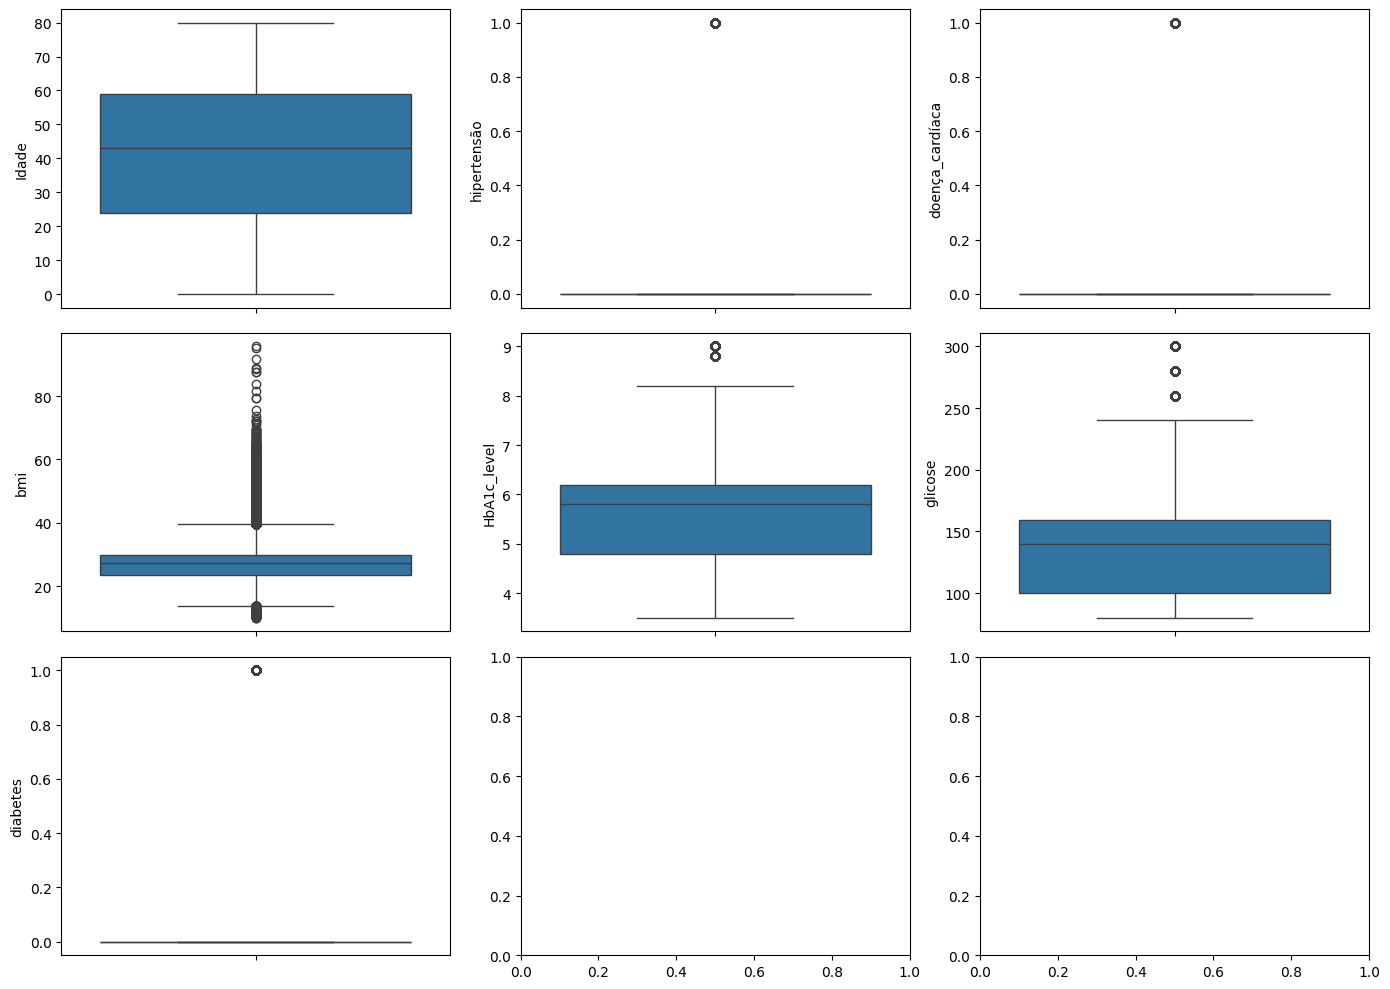

In [162]:
#carregar variaveis para plot
variaveis_numericas = []
for i in df_traduzida.columns[0:16].tolist():
        if df_traduzida.dtypes[i] == 'int64' or df_traduzida.dtypes[i] == 'float64':            
            print(i, ':' , df_traduzida.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_traduzida, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

In [163]:
df_traduzida['Idade'].value_counts()

Idade
80.00    4932
51.00    1566
47.00    1511
48.00    1508
53.00    1498
57.00    1485
49.00    1479
52.00    1476
55.00    1457
54.00    1454
46.00    1452
62.00    1440
45.00    1424
38.00    1420
43.00    1407
50.00    1401
56.00    1383
59.00    1377
39.00    1374
60.00    1370
61.00    1365
44.00    1355
40.00    1349
42.00    1323
58.00    1318
28.00    1304
29.00    1298
37.00    1263
41.00    1253
30.00    1244
31.00    1225
27.00    1219
19.00    1212
34.00    1211
36.00    1208
26.00    1201
33.00    1197
32.00    1196
25.00    1196
23.00    1192
21.00    1189
35.00    1183
22.00    1182
24.00    1181
20.00    1180
2.00     1159
66.00    1155
18.00    1132
65.00    1112
64.00    1083
63.00    1061
67.00    1021
3.00      995
16.00     985
17.00     979
68.00     966
5.00      958
15.00     943
69.00     942
4.00      923
13.00     909
70.00     903
6.00      900
14.00     883
7.00      880
12.00     859
71.00     857
8.00      838
10.00     821
73.00     810
11.00     804


# PESSOAS COM DIABETES 

In [164]:
diabetes = df_traduzida.loc[df_traduzida['diabetes'] == 1]
diabetes.head()

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1


# PESSOAS SEM DIABETES 

In [165]:
semdiabetes = df_traduzida.loc[df_traduzida['diabetes'] == 0]
semdiabetes.head()

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## SEGMENTANDO AS IDADES DAS PESSOAS QUE TEM E NÃO DIABETES

## JOVENS COM DIABETES

In [166]:
jovens = diabetes[diabetes['Idade']<=29] 
jovens['Idade'].value_counts().sum()

274

### UMA BREVE ANÁLISE DOS JOVENS COM DIABETES

In [167]:
quantidade = jovens.groupby(["Sexo"])["Idade"].count().rename('QuantidadeSexo')
hipertesao = jovens.groupby(['Sexo'])['hipertensão'].count().rename('QuantidadeHipersão')
cardio =jovens.groupby(['Sexo'])['doença_cardíaca'].count().rename('QuantidadeDoençaCardiaca')
bmi = jovens.groupby(['Sexo'])['bmi'].mean().rename('MédiaDoBmi')
hb = jovens.groupby(['Sexo'])['HbA1c_level'].mean().rename('MédiaHbA1c')
glicose = jovens.groupby(['Sexo'])['glicose'].mean().rename('MédiaGlicose')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":quantidade,'QuantidadeHipersão':hipertesao,'QuantidadeDoençaCardiaca':cardio,'MédiaDoBmi':bmi,'MédiaHbA1c':hb,'MédiaGlicose':glicose})

dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,QuantidadeHipersão,QuantidadeDoençaCardiaca,MédiaDoBmi,MédiaHbA1c,MédiaGlicose
Sexo,,,,,,
Female,158,158,158,28.233544,6.981646,192.316456
Male,116,116,116,26.437586,6.904310,190.362069


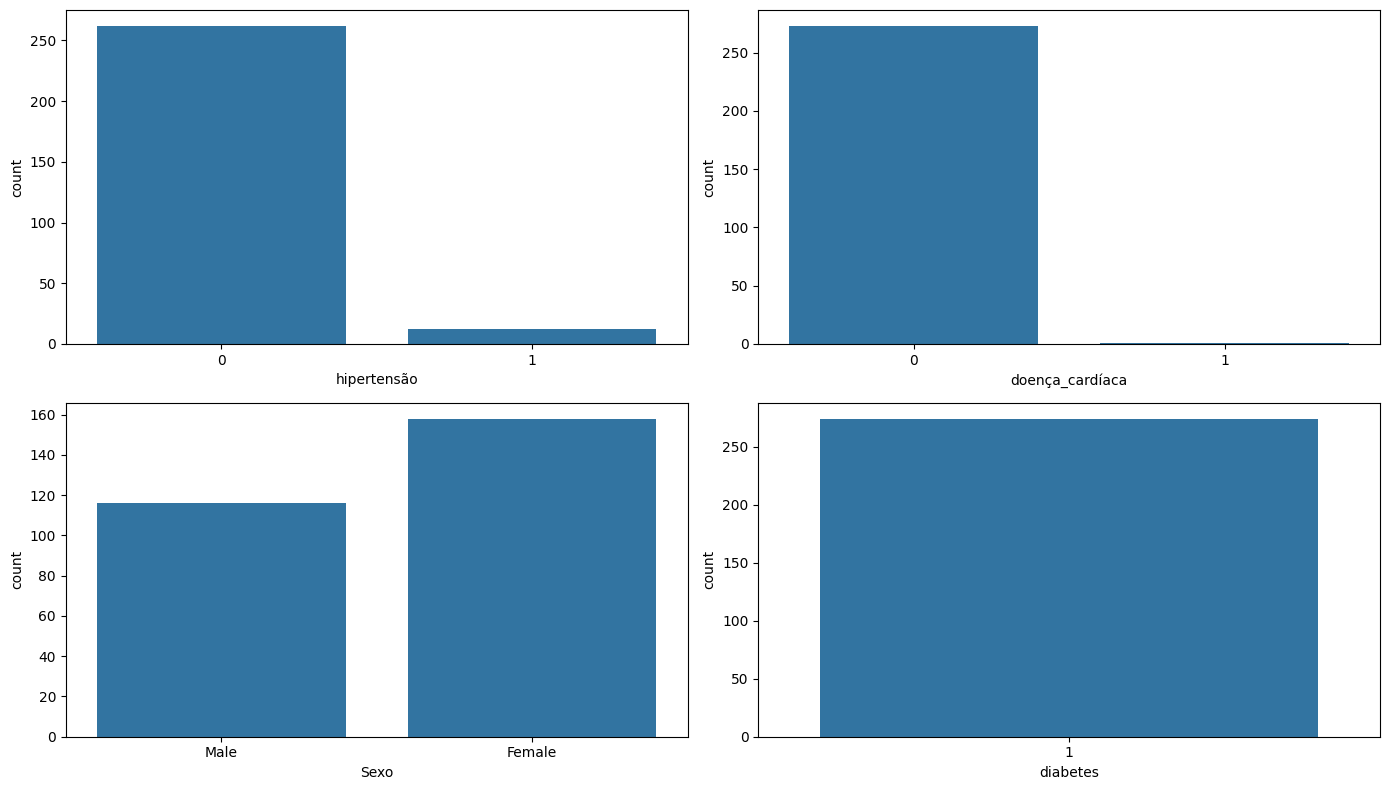

In [168]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = jovens, x="hipertensão", ax=axes[0][0])
sns.countplot(data = jovens, x="doença_cardíaca", ax=axes[0][1])
sns.countplot(data = jovens, x="Sexo", ax=axes[1][0])
sns.countplot(data = jovens, x="diabetes", ax=axes[1][1])

plt.show()

### AVALIANDO HISTORICO DE TABAGISMO DO JOVENS COM DIABTES

In [169]:
quantidade = jovens.groupby(["histórico_tabagismo"])["Idade"].count().rename('QuantidadeSexo')
hipertesao = jovens.groupby(['histórico_tabagismo'])['hipertensão'].count().rename('QuantidadeHipersão')
cardio =jovens.groupby(['histórico_tabagismo'])['doença_cardíaca'].count().rename('QuantidadeDoençaCardiaca')
bmi = jovens.groupby(['histórico_tabagismo'])['bmi'].mean().rename('MédiaDoBmi')
hb = jovens.groupby(['histórico_tabagismo'])['HbA1c_level'].mean().rename('MédiaHbA1c')
glicose = jovens.groupby(['histórico_tabagismo'])['glicose'].mean().rename('MédiaGlicose')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":quantidade,'QuantidadeHipersão':hipertesao,'QuantidadeDoençaCardiaca':cardio,'MédiaDoBmi':bmi,'MédiaHbA1c':hb,'MédiaGlicose':glicose})

dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,QuantidadeHipersão,QuantidadeDoençaCardiaca,MédiaDoBmi,MédiaHbA1c,MédiaGlicose
histórico_tabagismo,,,,,,
never,117,117,117,26.891709,6.979487,195.068376
No Info,77,77,77,25.832857,6.862338,188.896104
current,39,39,39,29.381538,6.969231,189.717949
not current,25,25,25,29.757600,7.072000,186.680000
ever,11,11,11,29.576364,6.863636,190.818182


## JOVENS SEM DIABETES

In [170]:
jovensem = semdiabetes[semdiabetes['Idade']<=29] 
jovensem['Idade'].value_counts().sum()

30900

### UMA BREVE ANÁLISE DOS JOVENS SEM DIABETES

In [171]:
quantidade = jovenssem.groupby(["Sexo"])["Idade"].count().rename('QuantidadeSexo')
hipertesao = jovenssem.groupby(['Sexo'])['hipertensão'].count().rename('QuantidadeHipersão')
cardio =jovenssem.groupby(['Sexo'])['doença_cardíaca'].count().rename('QuantidadeDoençaCardiaca')
bmi = jovenssem.groupby(['Sexo'])['bmi'].mean().rename('MédiaDoBmi')
hb = jovenssem.groupby(['Sexo'])['HbA1c_level'].mean().rename('MédiaHbA1c')
glicose = jovenssem.groupby(['Sexo'])['glicose'].mean().rename('MédiaGlicose')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":quantidade,'QuantidadeHipersão':hipertesao,'QuantidadeDoençaCardiaca':cardio,'MédiaDoBmi':bmi,'MédiaHbA1c':hb,'MédiaGlicose':glicose})

dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,QuantidadeHipersão,QuantidadeDoençaCardiaca,MédiaDoBmi,MédiaHbA1c,MédiaGlicose
Sexo,,,,,,
Female,17410,17410,17410,24.137367,5.385474,132.947501
Male,13479,13479,13479,23.074654,5.402419,132.831664
Other,11,11,11,24.952727,5.345455,136.272727


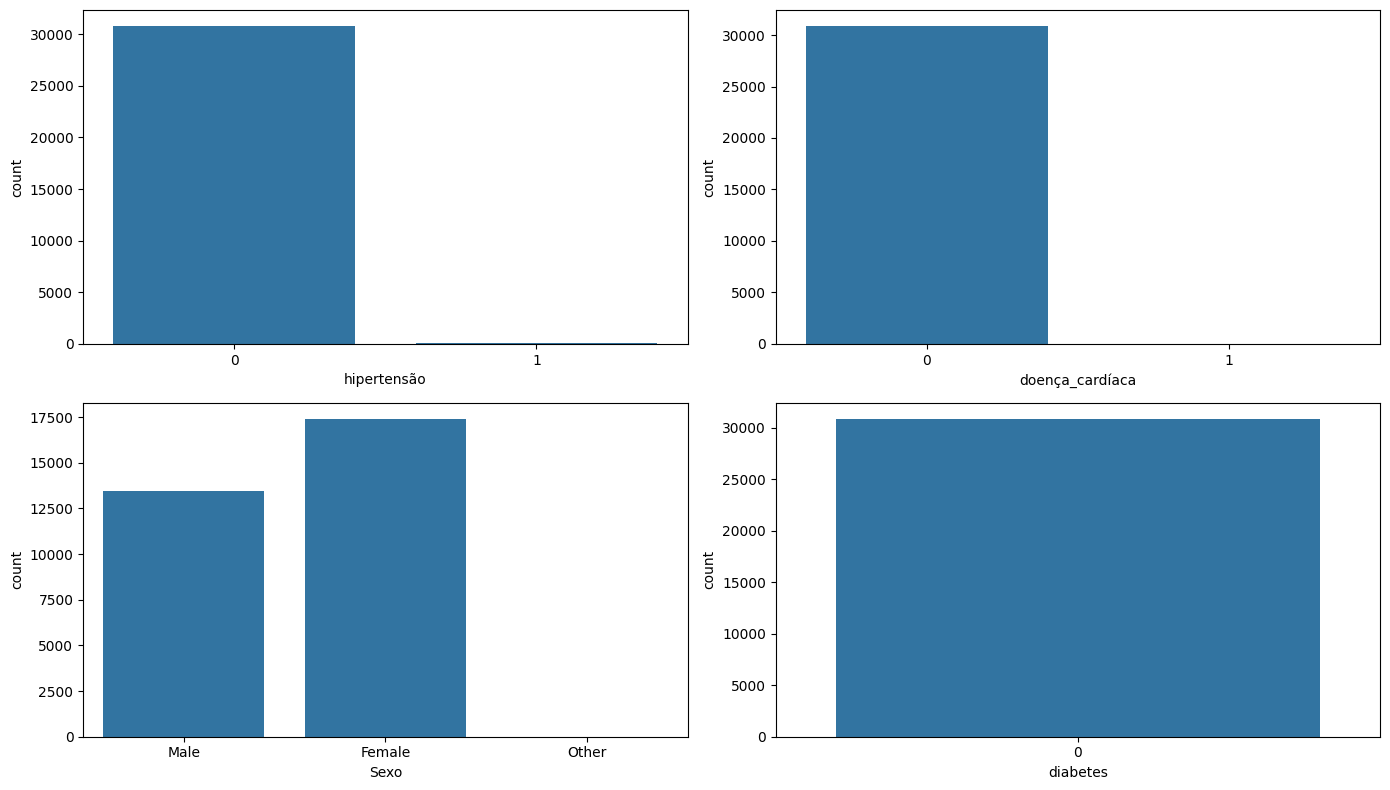

In [172]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = jovenssem, x="hipertensão", ax=axes[0][0])
sns.countplot(data = jovenssem, x="doença_cardíaca", ax=axes[0][1])
sns.countplot(data = jovenssem, x="Sexo", ax=axes[1][0])
sns.countplot(data = jovenssem, x="diabetes", ax=axes[1][1])

plt.show()

### AVALIANDO HISTORICO DE TABAGISMO DO JOVENS SEM DIABTES

In [173]:
quantidade = jovenssem.groupby(["histórico_tabagismo"])["Idade"].count().rename('QuantidadeSexo')
hipertesao = jovenssem.groupby(['histórico_tabagismo'])['hipertensão'].count().rename('QuantidadeHipersão')
cardio =jovenssem.groupby(['histórico_tabagismo'])['doença_cardíaca'].count().rename('QuantidadeDoençaCardiaca')
bmi = jovenssem.groupby(['histórico_tabagismo'])['bmi'].mean().rename('MédiaDoBmi')
hb = jovenssem.groupby(['histórico_tabagismo'])['HbA1c_level'].mean().rename('MédiaHbA1c')
glicose = jovenssem.groupby(['histórico_tabagismo'])['glicose'].mean().rename('MédiaGlicose')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":quantidade,'QuantidadeHipersão':hipertesao,'QuantidadeDoençaCardiaca':cardio,'MédiaDoBmi':bmi,'MédiaHbA1c':hb,'MédiaGlicose':glicose})

dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,QuantidadeHipersão,QuantidadeDoençaCardiaca,MédiaDoBmi,MédiaHbA1c,MédiaGlicose
histórico_tabagismo,,,,,,
No Info,16563,16563,16563,21.910306,5.404516,132.661776
never,9577,9577,9577,25.089888,5.381852,132.961888
current,1973,1973,1973,27.304693,5.369184,134.254435
not current,1432,1432,1432,25.629392,5.377444,132.580307
former,710,710,710,28.256366,5.349718,133.492958


## ADULTOS COM DIABETES

In [174]:
adultos = diabetes.query('Idade > 29 and Idade <= 59')
adultos['Idade'].value_counts().sum()

3290

### UMA BREVE ANÁLISE DOS ADULTOS COM DIABETES

In [175]:
quantidade = adultos.groupby(["Sexo"])["Idade"].count().rename('QuantidadeSexo')
hipertesao = adultos.groupby(['Sexo'])['hipertensão'].count().rename('QuantidadeHipersão')
cardio =adultos.groupby(['Sexo'])['doença_cardíaca'].count().rename('QuantidadeDoençaCardiaca')
bmi = adultos.groupby(['Sexo'])['bmi'].mean().rename('MédiaDoBmi')
hb = adultos.groupby(['Sexo'])['HbA1c_level'].mean().rename('MédiaHbA1c')
glicose = adultos.groupby(['Sexo'])['glicose'].mean().rename('MédiaGlicose')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":quantidade,'QuantidadeHipersão':hipertesao,'QuantidadeDoençaCardiaca':cardio,'MédiaDoBmi':bmi,'MédiaHbA1c':hb,'MédiaGlicose':glicose})

dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,QuantidadeHipersão,QuantidadeDoençaCardiaca,MédiaDoBmi,MédiaHbA1c,MédiaGlicose
Sexo,,,,,,
Female,1697,1697,1697,34.773282,6.943901,192.112552
Male,1593,1593,1593,32.964463,6.930446,193.476460


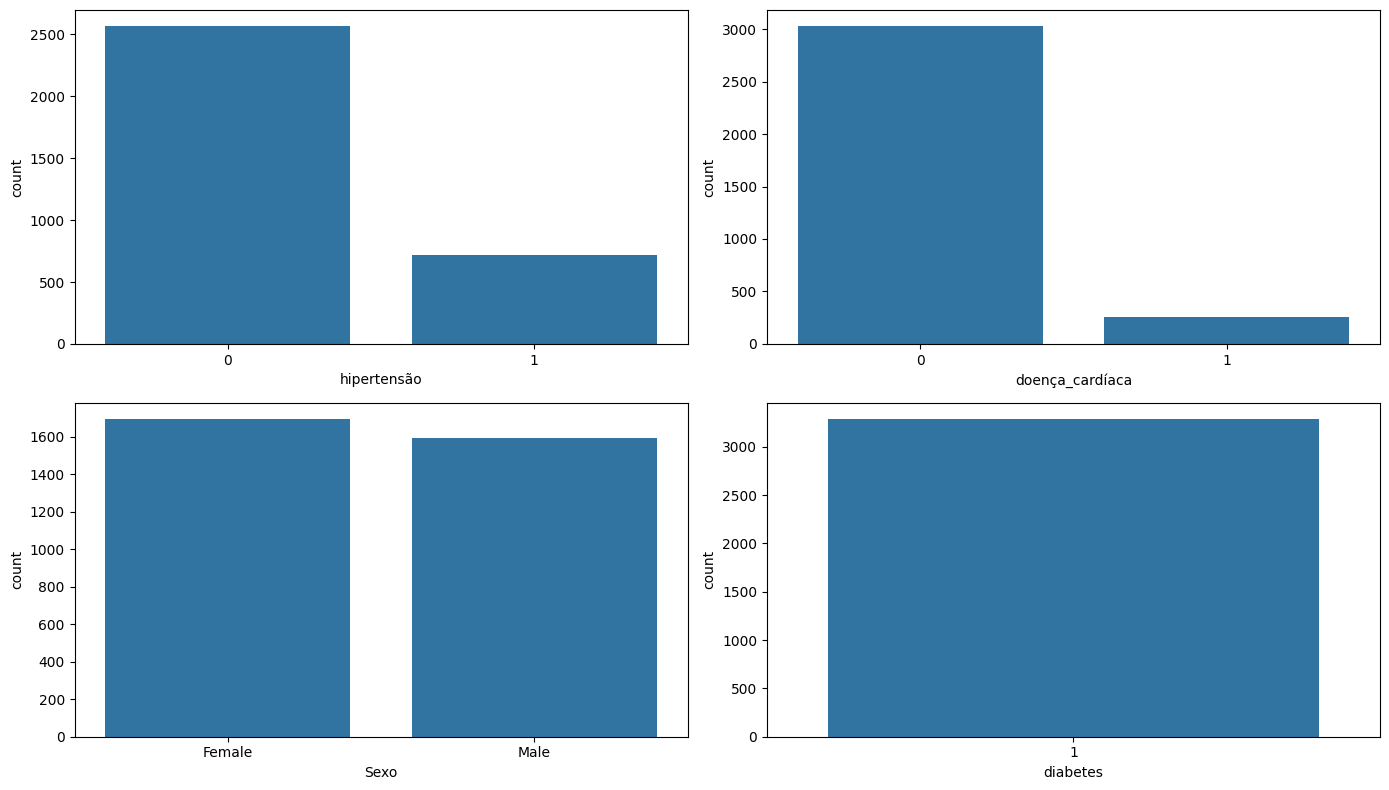

In [176]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = adultos, x="hipertensão", ax=axes[0][0])
sns.countplot(data = adultos, x="doença_cardíaca", ax=axes[0][1])
sns.countplot(data = adultos, x="Sexo", ax=axes[1][0])
sns.countplot(data = adultos, x="diabetes", ax=axes[1][1])

plt.show()

### AVALIANDO HISTORICO DE TABAGISMO DO ADULTOS COM DIABTES

In [177]:
quantidade = adultos.groupby(["histórico_tabagismo"])["Idade"].count().rename('QuantidadeSexo')
hipertesao = adultos.groupby(['histórico_tabagismo'])['hipertensão'].count().rename('QuantidadeHipersão')
cardio =adultos.groupby(['histórico_tabagismo'])['doença_cardíaca'].count().rename('QuantidadeDoençaCardiaca')
bmi = adultos.groupby(['histórico_tabagismo'])['bmi'].mean().rename('MédiaDoBmi')
hb = adultos.groupby(['histórico_tabagismo'])['HbA1c_level'].mean().rename('MédiaHbA1c')
glicose = adultos.groupby(['histórico_tabagismo'])['glicose'].mean().rename('MédiaGlicose')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":quantidade,'QuantidadeHipersão':hipertesao,'QuantidadeDoençaCardiaca':cardio,'MédiaDoBmi':bmi,'MédiaHbA1c':hb,'MédiaGlicose':glicose})

dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,QuantidadeHipersão,QuantidadeDoençaCardiaca,MédiaDoBmi,MédiaHbA1c,MédiaGlicose
histórico_tabagismo,,,,,,
never,1308,1308,1308,34.534534,6.930046,191.666667
current,529,529,529,32.934707,6.985066,195.720227
No Info,528,528,528,32.815360,6.933333,195.255682
former,453,453,453,34.754216,6.933775,192.487859
not current,265,265,265,33.715736,6.910943,191.849057


## ADULTOS SEM DIABETES

In [178]:
adultosem = semdiabetes.query('Idade > 29 and Idade <= 59')
adultosem['Idade'].value_counts().sum()

37707

### UMA BREVE ANÁLISE DOS ADULTOS SEM DIABETES

In [179]:
quantidade = adultosem.groupby(["Sexo"])["Idade"].count().rename('QuantidadeSexo')
hipertesao = adultosem.groupby(['Sexo'])['hipertensão'].count().rename('QuantidadeHipersão')
cardio =adultosem.groupby(['Sexo'])['doença_cardíaca'].count().rename('QuantidadeDoençaCardiaca')
bmi = adultosem.groupby(['Sexo'])['bmi'].mean().rename('MédiaDoBmi')
hb = adultosem.groupby(['Sexo'])['HbA1c_level'].mean().rename('MédiaHbA1c')
glicose = adultosem.groupby(['Sexo'])['glicose'].mean().rename('MédiaGlicose')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":quantidade,'QuantidadeHipersão':hipertesao,'QuantidadeDoençaCardiaca':cardio,'MédiaDoBmi':bmi,'MédiaHbA1c':hb,'MédiaGlicose':glicose})

dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,QuantidadeHipersão,QuantidadeDoençaCardiaca,MédiaDoBmi,MédiaHbA1c,MédiaGlicose
Sexo,,,,,,
Female,23029,23029,23029,28.762011,5.399075,132.727691
Male,14671,14671,14671,29.167314,5.406782,132.712017
Other,7,7,7,31.192857,5.500000,144.428571


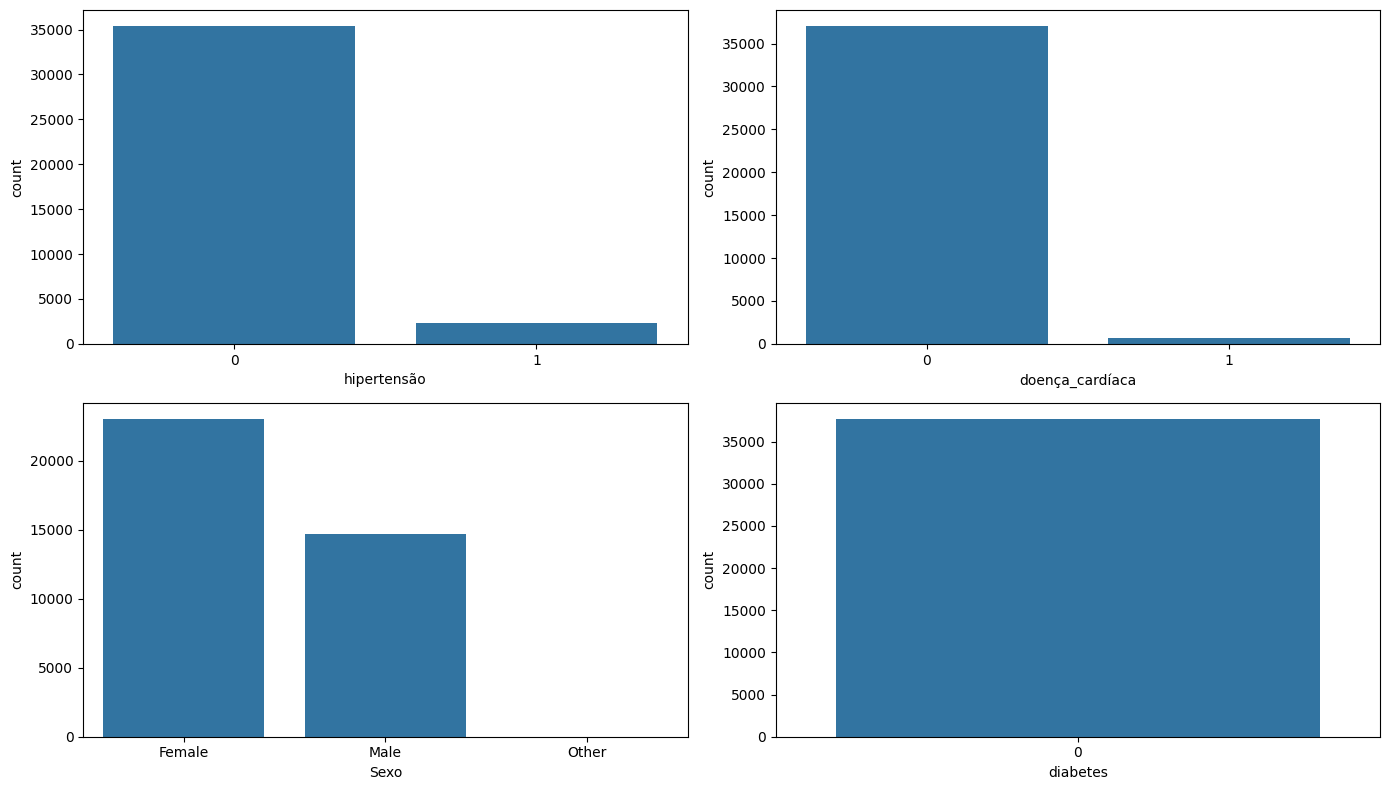

In [180]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = adultosem, x="hipertensão", ax=axes[0][0])
sns.countplot(data = adultosem, x="doença_cardíaca", ax=axes[0][1])
sns.countplot(data = adultosem, x="Sexo", ax=axes[1][0])
sns.countplot(data = adultosem, x="diabetes", ax=axes[1][1])

plt.show()

### AVALIANDO HISTORICO DE TABAGISMO DO ADULTOS SEM DIABTES

In [181]:
quantidade = adultosem.groupby(["histórico_tabagismo"])["Idade"].count().rename('QuantidadeSexo')
hipertesao = adultosem.groupby(['histórico_tabagismo'])['hipertensão'].count().rename('QuantidadeHipersão')
cardio =adultosem.groupby(['histórico_tabagismo'])['doença_cardíaca'].count().rename('QuantidadeDoençaCardiaca')
bmi = adultosem.groupby(['histórico_tabagismo'])['bmi'].mean().rename('MédiaDoBmi')
hb = adultosem.groupby(['histórico_tabagismo'])['HbA1c_level'].mean().rename('MédiaHbA1c')
glicose = adultosem.groupby(['histórico_tabagismo'])['glicose'].mean().rename('MédiaGlicose')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":quantidade,'QuantidadeHipersão':hipertesao,'QuantidadeDoençaCardiaca':cardio,'MédiaDoBmi':bmi,'MédiaHbA1c':hb,'MédiaGlicose':glicose})

dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,QuantidadeHipersão,QuantidadeDoençaCardiaca,MédiaDoBmi,MédiaHbA1c,MédiaGlicose
histórico_tabagismo,,,,,,
never,14936,14936,14936,29.063828,5.405731,133.006494
No Info,9619,9619,9619,28.481449,5.400457,132.318224
current,5043,5043,5043,28.670583,5.398731,133.011303
former,3584,3584,3584,29.851381,5.398438,132.722935
not current,2576,2576,2576,28.931456,5.397943,132.385870


## IDOSOS SEM DIABETES

In [182]:
idososem = semdiabetes.query('Idade > 59 and Idade <= 80')
idososem['Idade'].value_counts().sum()

19057

### UMA BREVE ANÁLISE DOS IDOSOS SEM DIABETES

In [183]:
quantidade = idososem.groupby(["Sexo"])["Idade"].count().rename('QuantidadeSexo')
hipertesao = idososem.groupby(['Sexo'])['hipertensão'].count().rename('QuantidadeHipersão')
cardio =idososem.groupby(['Sexo'])['doença_cardíaca'].count().rename('QuantidadeDoençaCardiaca')
bmi = idososem.groupby(['Sexo'])['bmi'].mean().rename('MédiaDoBmi')
hb = idososem.groupby(['Sexo'])['HbA1c_level'].mean().rename('MédiaHbA1c')
glicose = idososem.groupby(['Sexo'])['glicose'].mean().rename('MédiaGlicose')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":quantidade,'QuantidadeHipersão':hipertesao,'QuantidadeDoençaCardiaca':cardio,'MédiaDoBmi':bmi,'MédiaHbA1c':hb,'MédiaGlicose':glicose})

dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,QuantidadeHipersão,QuantidadeDoençaCardiaca,MédiaDoBmi,MédiaHbA1c,MédiaGlicose
Sexo,,,,,,
Female,11275,11275,11275,27.865831,5.388160,132.568071
Male,7782,7782,7782,28.172105,5.400887,133.323953


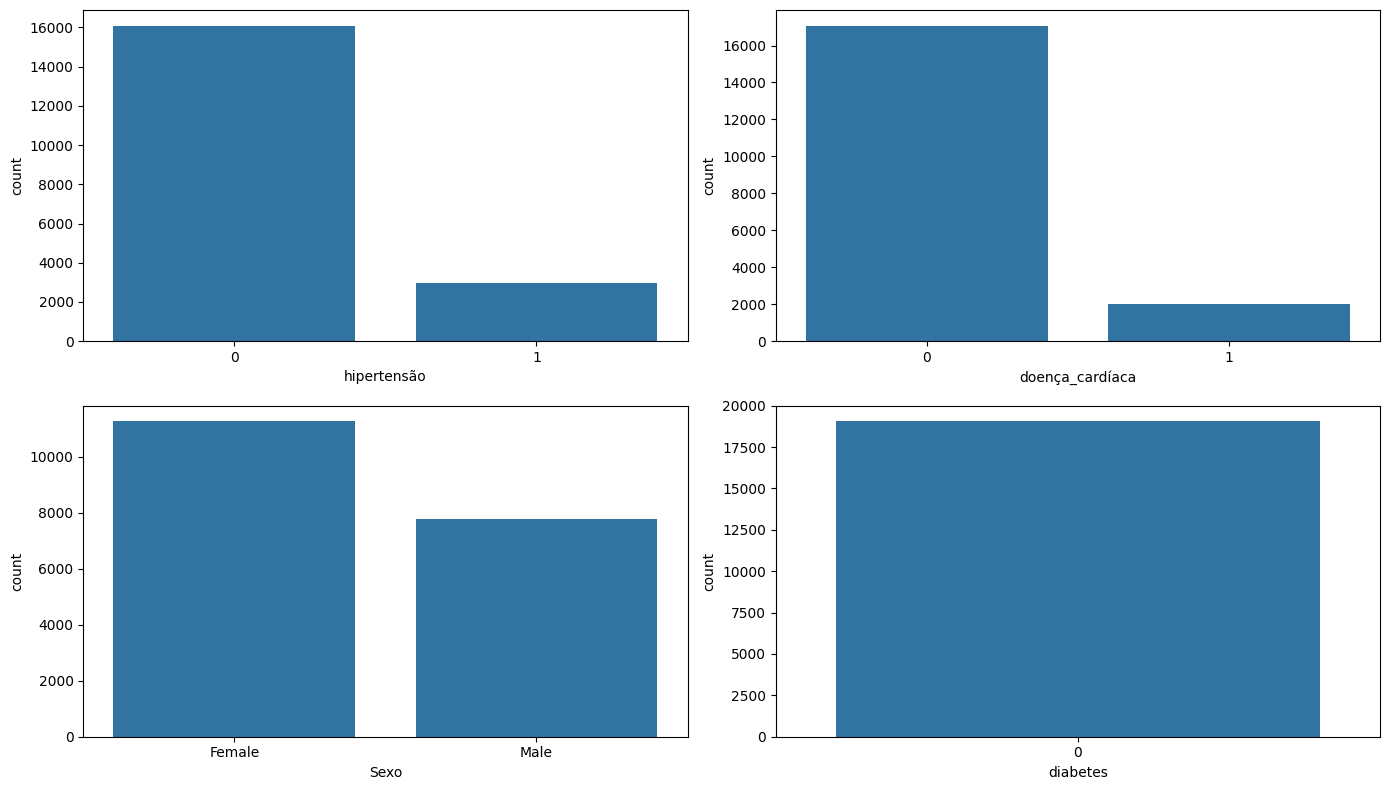

In [184]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = idososem, x="hipertensão", ax=axes[0][0])
sns.countplot(data = idososem, x="doença_cardíaca", ax=axes[0][1])
sns.countplot(data = idososem, x="Sexo", ax=axes[1][0])
sns.countplot(data = idososem, x="diabetes", ax=axes[1][1])

plt.show()

### AVALIANDO HISTORICO DE TABAGISMO DO IDOSOS SEM DIABTES

In [185]:
quantidade = idososem.groupby(["histórico_tabagismo"])["Idade"].count().rename('QuantidadeSexo')
hipertesao = idososem.groupby(['histórico_tabagismo'])['hipertensão'].count().rename('QuantidadeHipersão')
cardio =idososem.groupby(['histórico_tabagismo'])['doença_cardíaca'].count().rename('QuantidadeDoençaCardiaca')
bmi = idososem.groupby(['histórico_tabagismo'])['bmi'].mean().rename('MédiaDoBmi')
hb = idososem.groupby(['histórico_tabagismo'])['HbA1c_level'].mean().rename('MédiaHbA1c')
glicose = idososem.groupby(['histórico_tabagismo'])['glicose'].mean().rename('MédiaGlicose')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":quantidade,'QuantidadeHipersão':hipertesao,'QuantidadeDoençaCardiaca':cardio,'MédiaDoBmi':bmi,'MédiaHbA1c':hb,'MédiaGlicose':glicose})

dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,QuantidadeHipersão,QuantidadeDoençaCardiaca,MédiaDoBmi,MédiaHbA1c,MédiaGlicose
histórico_tabagismo,,,,,,
never,6548,6548,6548,28.218129,5.398076,133.065516
No Info,5260,5260,5260,27.796582,5.379411,132.858745
former,3415,3415,3415,28.442302,5.399912,132.980088
not current,1669,1669,1669,27.662894,5.423307,132.836429
current,1233,1233,1233,26.946302,5.388240,131.911598


## IDOSOS COM DIABETES 

In [186]:
idosos = diabetes.query('Idade > 59 and Idade <= 80')
idosos['Idade'].value_counts().sum()

4918

### UMA BREVE ANÁLISE DOS IDOSOS COM DIABETES

In [187]:
quantidade = idosos.groupby(["Sexo"])["Idade"].count().rename('QuantidadeSexo')
hipertesao = idosos.groupby(['Sexo'])['hipertensão'].count().rename('QuantidadeHipersão')
cardio =idosos.groupby(['Sexo'])['doença_cardíaca'].count().rename('QuantidadeDoençaCardiaca')
bmi = idosos.groupby(['Sexo'])['bmi'].mean().rename('MédiaDoBmi')
hb = idosos.groupby(['Sexo'])['HbA1c_level'].mean().rename('MédiaHbA1c')
glicose = idosos.groupby(['Sexo'])['glicose'].mean().rename('MédiaGlicose')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":quantidade,'QuantidadeHipersão':hipertesao,'QuantidadeDoençaCardiaca':cardio,'MédiaDoBmi':bmi,'MédiaHbA1c':hb,'MédiaGlicose':glicose})

dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,QuantidadeHipersão,QuantidadeDoençaCardiaca,MédiaDoBmi,MédiaHbA1c,MédiaGlicose
Sexo,,,,,,
Female,2592,2592,2592,31.512951,6.932909,195.059028
Male,2326,2326,2326,30.383955,6.931685,194.946690


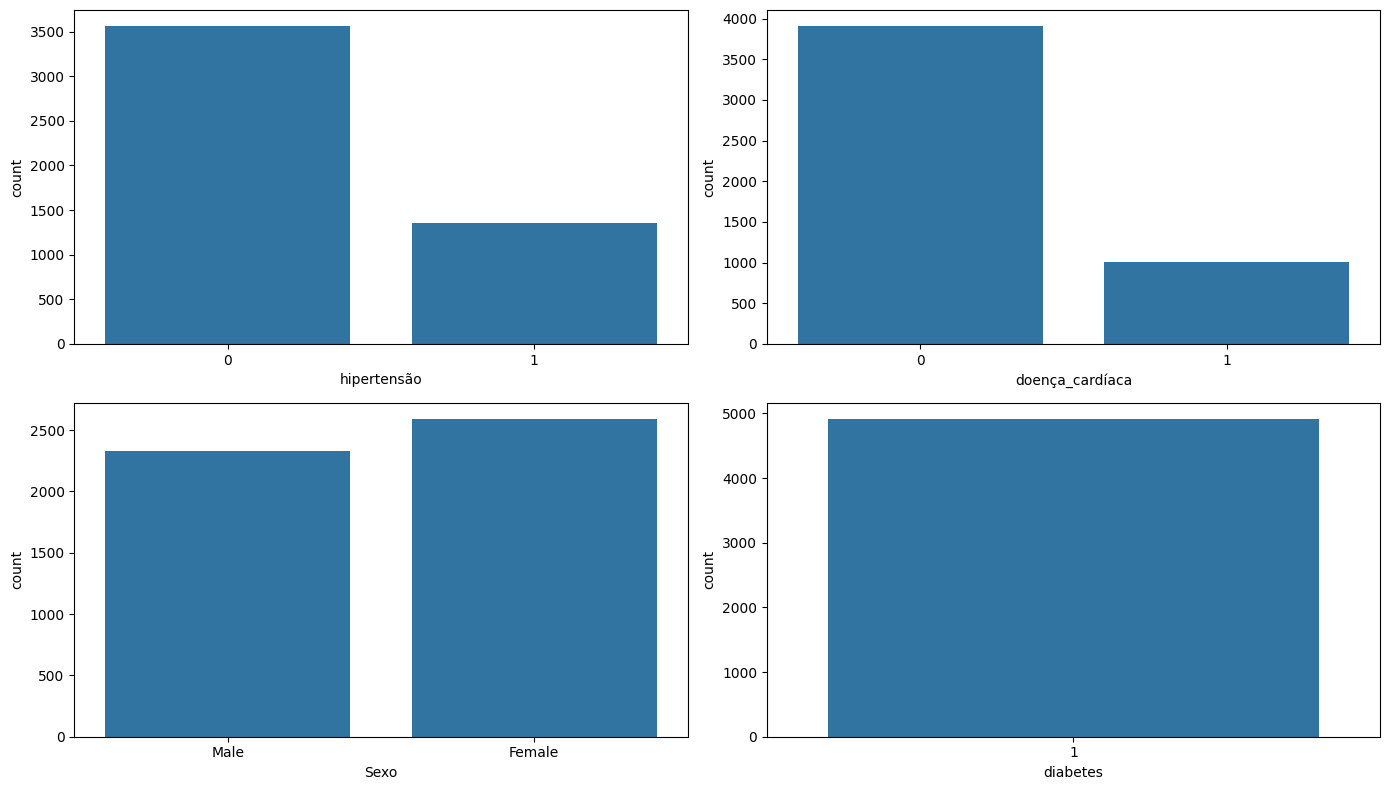

In [188]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = idosos, x="hipertensão", ax=axes[0][0])
sns.countplot(data = idosos, x="doença_cardíaca", ax=axes[0][1])
sns.countplot(data = idosos, x="Sexo", ax=axes[1][0])
sns.countplot(data = idosos, x="diabetes", ax=axes[1][1])

plt.show()

### AVALIANDO HISTORICO DE TABAGISMO DO IDOSOS COM DIABTES

In [189]:
quantidade = idosos.groupby(["histórico_tabagismo"])["Idade"].count().rename('QuantidadeSexo')
hipertesao = idosos.groupby(['histórico_tabagismo'])['hipertensão'].count().rename('QuantidadeHipersão')
cardio =idosos.groupby(['histórico_tabagismo'])['doença_cardíaca'].count().rename('QuantidadeDoençaCardiaca')
bmi = idosos.groupby(['histórico_tabagismo'])['bmi'].mean().rename('MédiaDoBmi')
hb = idosos.groupby(['histórico_tabagismo'])['HbA1c_level'].mean().rename('MédiaHbA1c')
glicose = idosos.groupby(['histórico_tabagismo'])['glicose'].mean().rename('MédiaGlicose')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":quantidade,'QuantidadeHipersão':hipertesao,'QuantidadeDoençaCardiaca':cardio,'MédiaDoBmi':bmi,'MédiaHbA1c':hb,'MédiaGlicose':glicose})

dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,QuantidadeHipersão,QuantidadeDoençaCardiaca,MédiaDoBmi,MédiaHbA1c,MédiaGlicose
histórico_tabagismo,,,,,,
never,1912,1912,1912,31.296773,6.927040,193.445607
former,1132,1132,1132,31.329267,6.900618,193.901060
No Info,840,840,840,30.160179,6.955952,197.539286
not current,400,400,400,31.439750,7.005500,199.102500
current,380,380,380,29.857947,6.903947,199.444737


# MACHINE LEARNING

### PRÉ-PROCESSAMENTO DOS DADOS 

In [190]:
df_traduzida.head(1)

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


In [191]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_traduzida['histórico_tabagismo'] = lb.fit_transform(df_traduzida['histórico_tabagismo'])
df_traduzida['Sexo'] = lb.fit_transform(df_traduzida['Sexo'])

# Remove valores missing eventualmente gerados
df_traduzida.dropna(inplace = True)

In [192]:
df_traduzida.head(1)

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0


In [193]:
# Supondo que 'df_traduzida' seja o DataFrame com seus dados
# Separa X e y
X = df_traduzida.iloc[:, :-1]
y = df_traduzida.iloc[:, -1]

### Balanceamento da variavel target 

Contagem de classes antes do balanceamento:
diabetes
0    87664
1     8482
Name: count, dtype: int64

Contagem de classes após o balanceamento:
diabetes
0    87664
1    87664
Name: count, dtype: int64


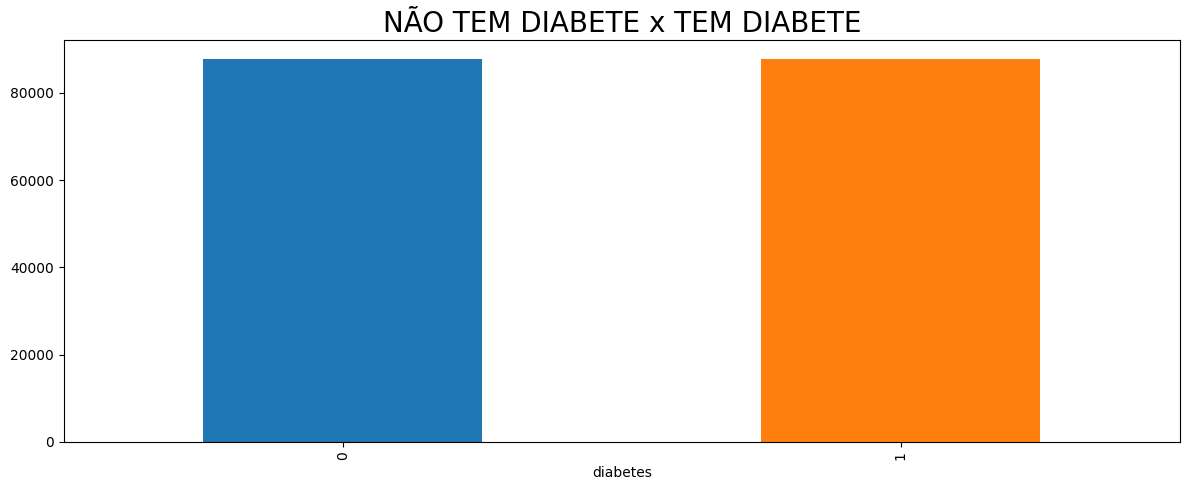

In [194]:

# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state=seed)

# Verifica a contagem de classes antes do balanceamento
print("Contagem de classes antes do balanceamento:")
print(y.value_counts())

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

# Verifica a contagem de classes após o balanceamento
print("\nContagem de classes após o balanceamento:")
print(pd.Series(y_res).value_counts())


# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
y_res.value_counts().plot(kind='bar', title='NÃO TEM DIABETE x TEM DIABETE',color = ['#1F77B4', '#FF7F0E']);

In [195]:
X.head(1)

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose
0,0,80.0,0,1,4,25.19,6.6,140


In [196]:
df_traduzida.shape  

(96146, 9)

# RandomForest

In [197]:
# SEPRANDO AS VARIAVEIS PARA TREINAMENTO

# Train Test Split:
from sklearn.model_selection import train_test_split
X_treino, X_test, y_treino, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=42)

In [198]:
#Random Forest Regressor:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()
modelo = modelo.fit(X_treino, y_treino)

#Prediction:
y_predii = modelo.predict(X_test)

#Scores:
print(r2_score(y_test, y_predii))
print(mean_squared_error(y_test, y_predii))

0.8898071282295912
0.027548052244339247


## Usando o RandomizedSearchCV

In [199]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Valores para o grid de hiperparâmetros
n_estimators = np.array([100, 150, 300])
max_depth = np.array([10, 20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2"])
min_samples_split = np.array([1, 2])
min_samples_leaf = np.array([1, 2])
bootstrap = [True, False]  # Corrigido aqui

# Numero de iterações do RandomizedSearch
iteracoes = 50

# Grid de hiperparâmetros
grid_parametros = dict(n_estimators=n_estimators,
                       max_depth=max_depth,
                       criterion=criterion,
                       max_features=max_features,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       bootstrap=bootstrap)

# Criando o modelo com o Grid de Hiperparâmetros
modelo = RandomForestClassifier()  # Você deve criar uma instância do modelo primeiro

modelo = RandomizedSearchCV(modelo, grid_parametros, cv=3, n_jobs=8, n_iter=iteracoes)

# Treinando os modelos
modelo.fit(X_treino, y_treino)

# Obtendo e visualizando os parâmetros treinados
treinos_rf = pd.DataFrame(modelo.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo.best_score_:.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo.best_params_}")
print("")
print("Numero de treinamentos realizados: ", treinos_rf.shape[0])

Acurácia em Treinamento: 96.76%

Hiperparâmetros Ideais: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False}

Numero de treinamentos realizados:  50


In [200]:
#Using confusion matrix to find the accuracy
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_predii)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_test, y_predii))
print(cm)


---------------------------

Accuracy of Predictions =  0.9724519477556608

---------------------------

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     26235
           1       0.98      0.97      0.97     26364

    accuracy                           0.97     52599
   macro avg       0.97      0.97      0.97     52599
weighted avg       0.97      0.97      0.97     52599

[[25588   647]
 [  802 25562]]


In [201]:
# Os valores a seguir são apenas exemplos, substitua-os pelos valores reais
Sexo = 0  # Exemplo: 0 para masculino, 1 para feminino
Idade = 40
hipertensão = 1  # 1 se tiver hipertensão, 0 caso contrário
doença_cardíaca = 0  # 1 se tiver doença cardíaca, 0 caso contrário
histórico_tabagismo = 1  # 1 se tiver histórico de tabagismo, 0 caso contrário
bmi = 25.0
HbA1c_level = 6.0
glicose = 123

# Crie um array numpy com os valores dos parâmetros
parametro = np.array([[Sexo, Idade, hipertensão, doença_cardíaca, histórico_tabagismo, bmi, HbA1c_level, glicose]])

# Agora tente fazer a previsão usando o modelo
fazendo_previsao = modelo.predict(parametro)
probabilidade = modelo.predict_proba(parametro)

# Agora você pode imprimir os resultados

if (fazendo_previsao == 0).any():
    print('NÃO TEM DIABETE ')
    print(probabilidade)

else:
    
    print('TEM DIABETE')
    print(probabilidade)

NÃO TEM DIABETE 
[[0.81246536 0.18753464]]


### SALVAR O MODELO PARA POR EM PRODUÇÃO

In [202]:
#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("maquina_preditiva_diabete3.pkl", mode = "wb") 
pickle.dump(modelo, pickle_out) 
pickle_out.close() 